In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display



In [2]:
## Check data

dsdata = pd.read_csv("Telco-Customer-Churn.csv") 
display(dsdata.head(n=2))
dsdata.info()

## No lack of data , however Senior citizen is 'int' and 'TotalCharges' is object

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [3]:
## Rearrange data
ds = dsdata.copy()

#ignore the churn
ds['Churn'].value_counts()
ds=ds[(ds[u'Churn']=='No')]
display(ds.head(n=2))

#Change type
ds['SeniorCitizen'] = ds.SeniorCitizen.astype(object)
ds['TotalCharges']  = pd.to_numeric(ds.TotalCharges, errors='coerce')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
##Basic analysis for every feature  

dsfeature = ds.columns
for i in dsfeature:
    if (i != 'customerID') and (i !='tenure') and (i !='MonthlyCharges') and (i !='TotalCharges') :
        ds[i].value_counts()
        print(i,'\n',ds[i].value_counts(),'\n')
        


gender 
 Male      2625
Female    2549
Name: gender, dtype: int64 

SeniorCitizen 
 0    4508
1     666
Name: SeniorCitizen, dtype: int64 

Partner 
 Yes    2733
No     2441
Name: Partner, dtype: int64 

Dependents 
 No     3390
Yes    1784
Name: Dependents, dtype: int64 

PhoneService 
 Yes    4662
No      512
Name: PhoneService, dtype: int64 

MultipleLines 
 No                  2541
Yes                 2121
No phone service     512
Name: MultipleLines, dtype: int64 

InternetService 
 DSL            1962
Fiber optic    1799
No             1413
Name: InternetService, dtype: int64 

OnlineSecurity 
 No                     2037
Yes                    1724
No internet service    1413
Name: OnlineSecurity, dtype: int64 

OnlineBackup 
 Yes                    1906
No                     1855
No internet service    1413
Name: OnlineBackup, dtype: int64 

DeviceProtection 
 No                     1884
Yes                    1877
No internet service    1413
Name: DeviceProtection, dtype: int

In [5]:
##Basic analysis for every feature  

ds.describe().round(4).T

,count,mean,std,min,25%,50%,75%,max
tenure,5174.0,37.5700,24.1138,0.00,15.000,38.000,61.000,72.00
MonthlyCharges,5174.0,61.2651,31.0926,18.25,25.100,64.425,88.400,118.75
TotalCharges,5163.0,2555.3441,2329.4570,18.80,577.825,1683.600,4264.125,8672.45


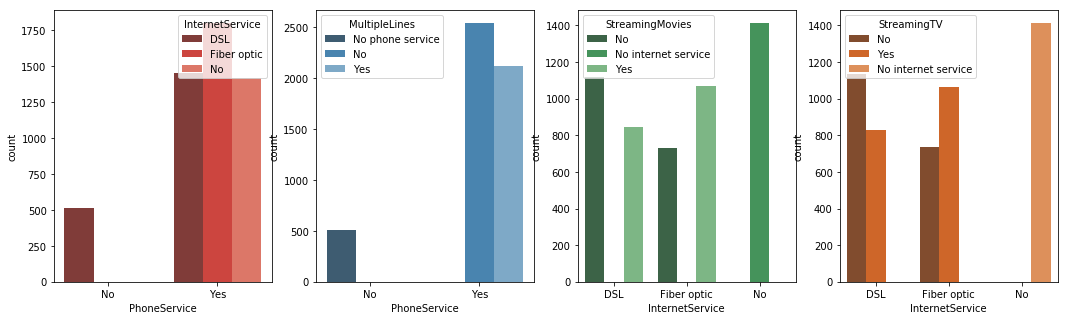

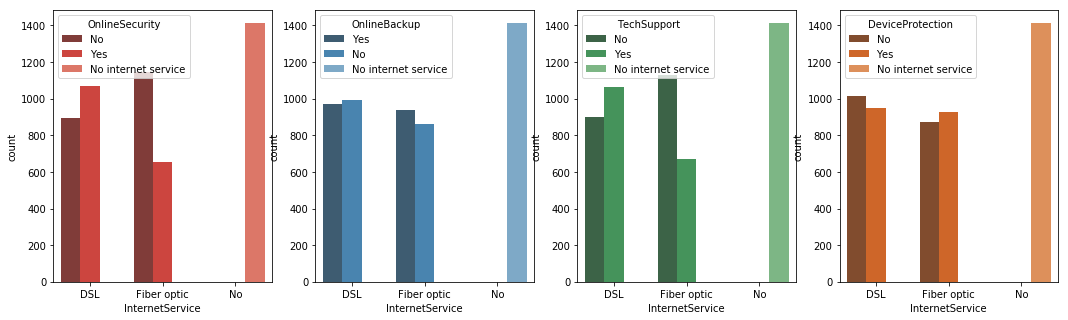

In [6]:
## Analysis of product preference
# Visual Service
fig, axes = plt.subplots(1,4,figsize=(18, 5)) 
sns.countplot(x=ds['PhoneService'],hue=ds['InternetService'], palette="Reds_d", ax=axes[0])
sns.countplot(x=ds['PhoneService'],hue=ds['MultipleLines'], palette="Blues_d", ax=axes[1])
sns.countplot(x=ds['InternetService'],hue=ds['StreamingMovies'],palette="Greens_d", ax=axes[2])
sns.countplot(x=ds['InternetService'],hue=ds['StreamingTV'],palette="Oranges_d", ax=axes[3])

# Visual Support
fig, axes = plt.subplots(1,4,figsize=(18, 5)) 
sns.countplot(x=ds['InternetService'],hue=ds['OnlineSecurity'],palette="Reds_d", ax=axes[0])
sns.countplot(x=ds['InternetService'],hue=ds['OnlineBackup'],palette="Blues_d", ax=axes[1])
sns.countplot(x=ds['InternetService'],hue=ds['TechSupport'],palette="Greens_d", ax=axes[2])
sns.countplot(x=ds['InternetService'],hue=ds['DeviceProtection'],palette="Oranges_d", ax=axes[3])


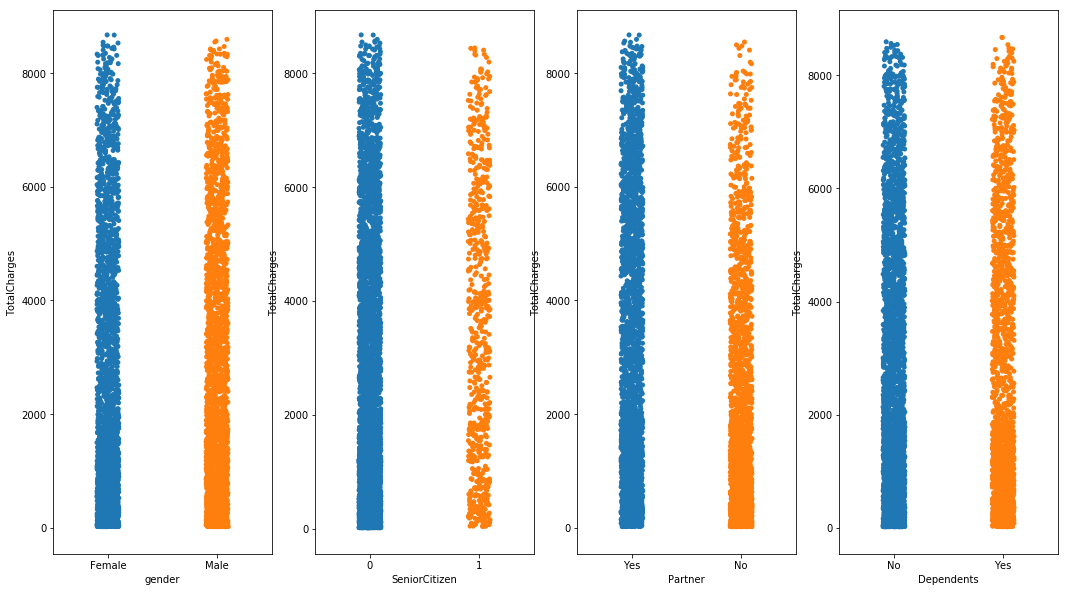

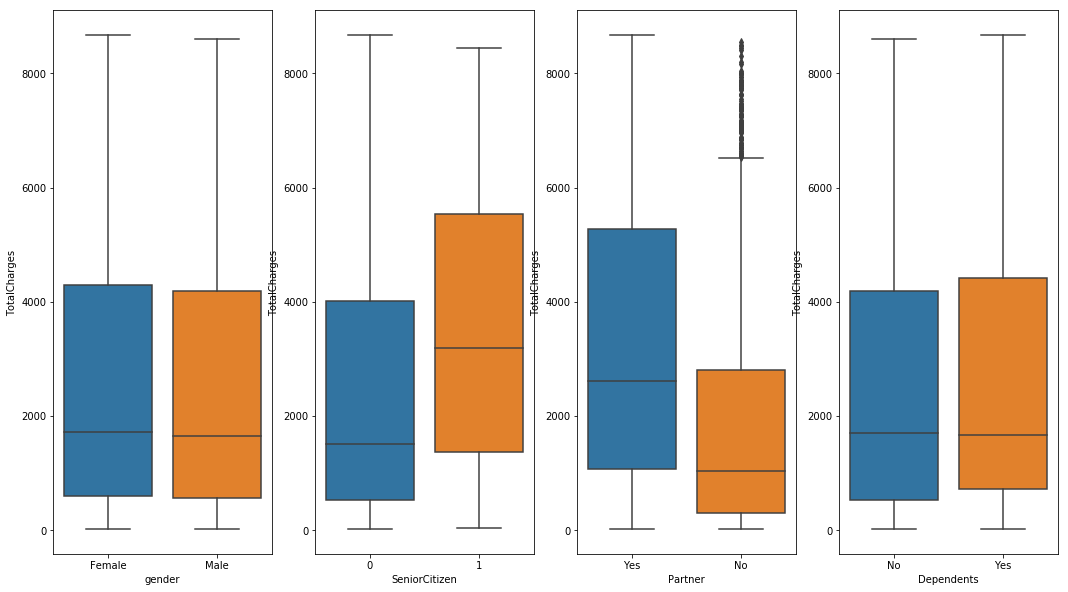

In [7]:
## Analsysis of revenue contribution, i.e. charges and tenure

#Segmentation

fig, axes = plt.subplots(1,4,figsize=(18, 10))
sns.stripplot(x=ds['gender'], y=ds['TotalCharges'],jitter=True, ax=axes[0])
sns.stripplot(x=ds['SeniorCitizen'], y=ds['TotalCharges'],jitter=True, ax=axes[1])
sns.stripplot(x=ds['Partner'], y=ds['TotalCharges'],jitter=True, ax=axes[2])
sns.stripplot(x=ds['Dependents'], y=ds['TotalCharges'],jitter=True, ax=axes[3])

fig, axes = plt.subplots(1,4,figsize=(18, 10))
sns.boxplot(x=ds['gender'], y=ds['TotalCharges'], ax=axes[0])
sns.boxplot(x=ds['SeniorCitizen'], y=ds['TotalCharges'], ax=axes[1])
sns.boxplot(x=ds['Partner'], y=ds['TotalCharges'], ax=axes[2])
sns.boxplot(x=ds['Dependents'], y=ds['TotalCharges'],ax=axes[3])
#Apparently gender & dependent do not matter much


In [8]:
## Analsysis of revenue contribution, i.e. charges and tenure
# Screen of 'Loyal Customer'

dscus=ds.copy()
dscus['SeniorCitizen'] = pd.to_numeric(dscus.SeniorCitizen, errors='coerce')
partner_mapping = {
           'Yes': 1,
           'No': 0}
dscus['Partner'] = dscus['Partner'].map(partner_mapping)       
dscus['Loyal'] = dscus['SeniorCitizen'] + dscus['Partner']

dscus=dscus[(dscus[u'Loyal']>=1)]

display(dscus.head(n=15))

dscus['Loyal'].value_counts()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Loyal
0,7590-VHVEG,Female,0,1,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
10,9763-GRSKD,Male,0,1,Yes,13,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No,1
12,8091-TTVAX,Male,0,1,No,58,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No,1
15,3655-SNQYZ,Female,0,1,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,1
21,1680-VDCWW,Male,0,1,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No,1
23,3638-WEABW,Female,0,1,No,58,Yes,Yes,DSL,No,...,Yes,No,No,Two year,Yes,Credit card (automatic),59.90,3505.10,No,1
24,6322-HRPFA,Male,0,1,Yes,49,Yes,No,DSL,Yes,...,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.30,No,1
28,5248-YGIJN,Male,0,1,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No,1
30,3841-NFECX,Female,1,1,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No,2
31,4929-XIHVW,Male,1,1,No,2,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No,2


1    2649
2     375
Name: Loyal, dtype: int64

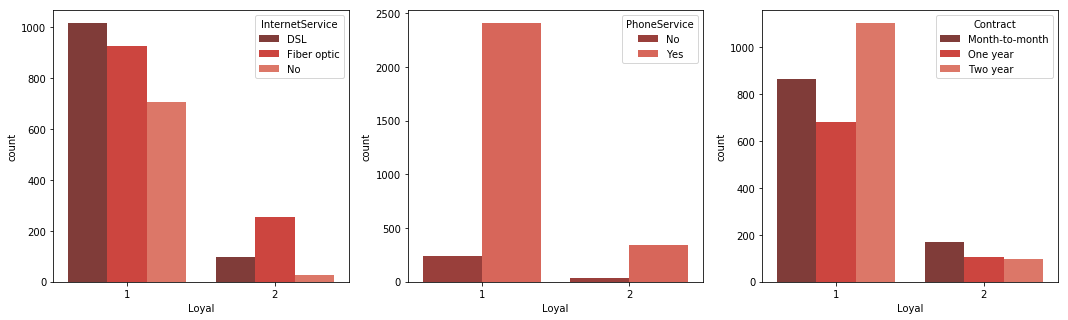

In [9]:
## Analysis of Loyal Customer
# Visual 
fig, axes = plt.subplots(1,3,figsize=(18, 5)) 
sns.countplot(x=dscus['Loyal'],hue=ds['InternetService'], palette="Reds_d", ax=axes[0])
sns.countplot(x=dscus['Loyal'],hue=ds['PhoneService'], palette="Reds_d", ax=axes[1])
sns.countplot(x=dscus['Loyal'],hue=ds['Contract'], palette="Reds_d", ax=axes[2])